In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, GlobalMaxPooling2D, Dropout

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cifar10= tf.keras.datasets.cifar10

In [5]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 80s 0us/step


In [6]:
x_train = x_train/255.0

In [7]:
x_test = x_test/255.0

In [8]:
y_train = y_train.flatten()

In [9]:
y_test = y_test.flatten()

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train.shape

(50000,)

In [14]:
K = len(set(y_train))    #number of classes
K

10

In [16]:
# build the model

i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense (1024, activation ='relu')(x)
x = Dropout (0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [17]:
#compile

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs= 15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.5754 - accuracy: 0.4235 - val_loss: 1.2950 - val_accuracy: 0.5359
Epoch 2/15
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.2910 - accuracy: 0.5347 - val_loss: 1.1359 - val_accuracy: 0.5894
Epoch 3/15
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.1570 - accuracy: 0.5844 - val_loss: 1.0371 - val_accuracy: 0.6310
Epoch 4/15
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.0614 - accuracy: 0.6188 - val_loss: 0.9964 - val_accuracy: 0.6496
Epoch 5/15
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.9787 - accuracy: 0.6494 - val_loss: 0.9344 - val_accuracy: 0.6709
Epoch 6/15
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.9245 - accuracy: 0.6709 - val_loss: 0.9130 - val_accuracy: 0.6813
Epoch 7/15
50000/50000 [==============================] 

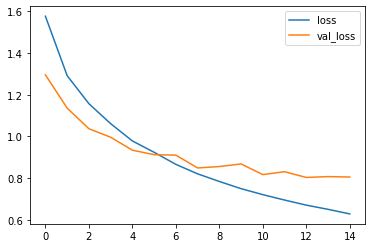

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

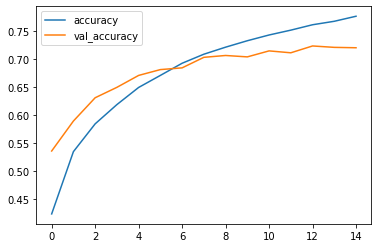

In [20]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [21]:
from mlxtend.plotting import plot_confusion_matrix

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
P= model.predict(x_test).argmax(axis=1)

In [24]:
P

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14c654aa5c8>)

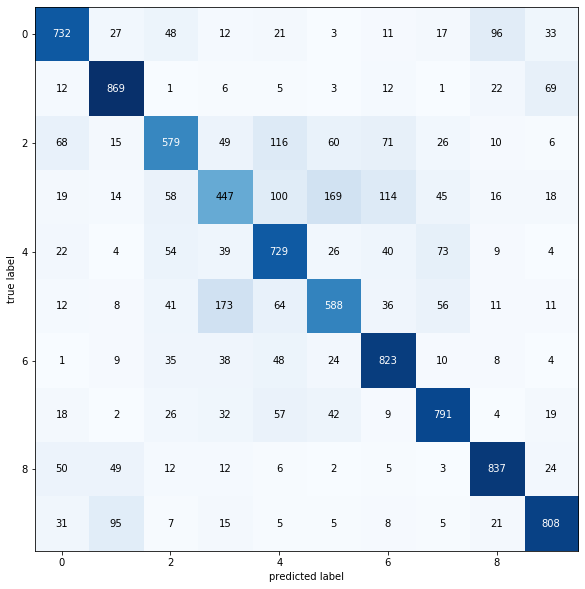

In [25]:
matrix = confusion_matrix (y_test, P)
plot_confusion_matrix(matrix, figsize=(10,10))